
# Algoritmos basados en árboles de decisión
Los algoritmos basados en árboles de decisión también son de aprendizaje supervisado y se pueden usar para tareas de regresión o clasificación.

El nombre de esta familia se debe a que usan una estructura básica, los árboles precisamente, que con simples reglas de decisión aplicadas sobre los datos les permite generar predicciones.

* Aprenden de los datos con reglas if-else en cada nodos. 

* Cada nodo representa una pregunta sobre los datos y cada rama del árbol representa una respuesta a esa pregunta. 

* El proceso continúa hasta que se llega a una hoja del árbol, que representa la predicción final.

* Desventaja:  Tendencia al sobreajuste u overfitting, lo que significa que pueden ajustarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de poda o regularización.



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# mostrar información del DataFrame
def info(df):
    display(df.head(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print('Duplicated: ',df.duplicated().sum())
    print()
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))


In [56]:
#dataset 
# https://www.kaggle.com/code/komalkhetlani/deep-analysis-of-travel-insurance-data

df = pd.read_csv('./datasets/train_house_price.csv')


In [57]:
info(df)

,last_price,total_area,bedrooms,ceiling_height,floors_total,living_area,floor,bike_parking,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest
0,108000.0,59.0,2,2.87,4,31.5,2,0,0,0,6.6,0,20485,8180
1,264000.0,109.0,4,3.15,5,72.0,2,0,0,0,12.2,0,42683,8643
2,140000.0,74.5,3,2.58,10,49.0,9,0,0,0,10.8,0,14078,16670
3,64000.0,37.4,1,2.50,9,20.0,4,0,0,0,6.2,2,17792,17699
4,133000.0,64.9,3,2.65,12,41.9,11,0,0,0,10.4,0,14767,10573
5,94000.0,63.2,3,2.60,9,44.0,2,0,0,0,7.2,1,20271,19273
6,175000.0,65.0,2,2.65,17,32.0,3,0,0,0,11.0,1,35452,15458
7,152000.0,72.0,3,2.50,10,42.0,5,0,0,0,8.0,1,10402,14768
8,63800.0,33.8,1,2.50,9,19.0,8,0,0,0,7.1,0,45657,16608
9,110000.0,51.2,2,2.90,4,31.5,2,0,0,0,7.8,0,14963,10770



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           6495 non-null   float64
 1   total_area           6495 non-null   float64
 2   bedrooms             6495 non-null   int64  
 3   ceiling_height       6495 non-null   float64
 4   floors_total         6495 non-null   int64  
 5   living_area          6495 non-null   float64
 6   floor                6495 non-null   int64  
 7   bike_parking         6495 non-null   int64  
 8   studio               6495 non-null   int64  
 9   open_plan            6495 non-null   int64  
 10  kitchen_area         6495 non-null   float64
 11  balcony              6495 non-null   int64  
 12  airports_nearest     6495 non-null   int64  
 13  cityCenters_nearest  6495 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 710.5 KB
None

         last_price   total_area  

In [58]:
# variables categóricas
# 1. price_class: 1 si el precio es mayor que la mediana, 0 en otro caso    
 
df.loc[df['last_price'] > df['last_price'].median(), 'price_class'] = 1
df.loc[df['last_price'] <= df['last_price'].median(), 'price_class'] = 0
print(df.head())

   last_price  total_area  bedrooms  ceiling_height  floors_total  \
0    108000.0        59.0         2            2.87             4   
1    264000.0       109.0         4            3.15             5   
2    140000.0        74.5         3            2.58            10   
3     64000.0        37.4         1            2.50             9   
4    133000.0        64.9         3            2.65            12   

   living_area  floor  bike_parking  studio  open_plan  kitchen_area  balcony  \
0         31.5      2             0       0          0           6.6        0   
1         72.0      2             0       0          0          12.2        0   
2         49.0      9             0       0          0          10.8        0   
3         20.0      4             0       0          0           6.2        2   
4         41.9     11             0       0          0          10.4        0   

   airports_nearest  cityCenters_nearest  price_class  
0             20485                 8180  

In [59]:
# variables objetivo y características  

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']


In [60]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() # Crear el modelo
model.fit(features, target) # Ajustar el modelo


DecisionTreeClassifier()

### 2 características

1. El primer apartamento tiene 12 dormitorios con una superficie total de 900 m². La superficie de la sala de estar es de 409.7 m² y la superficie de la cocina es de 112 m².
2. El segundo apartamento tiene 2 dormitorios con una superficie total de 109 m². La superficie de la sala de estar es de 32 m² y la de la cocina es de 40.5 m².

In [61]:

new_features = pd.DataFrame( # Crear 2 nuevas características
    [
        [None, None, 2.8, 25, None, 25, 0, 0, 0, None, 0, 30706.0, 7877.0],
        [None, None, 2.75, 25, None, 25, 0, 0, 0, None, 0, 36421.0, 9176.0]
    ],
    columns=features.columns
)

new_features.loc[0, 'total_area'] = 900.0 # Asignar valores a las características
new_features.loc[0, 'bedrooms'] = 12
new_features.loc[0, 'living_area'] = 409.7
new_features.loc[0, 'kitchen_area'] = 112.0

new_features.loc[1, 'total_area'] = 109.0
new_features.loc[1, 'bedrooms'] = 2
new_features.loc[1, 'living_area'] = 32.0
new_features.loc[1, 'kitchen_area'] = 40.5

answers = model.predict(new_features)
print(answers)
print(model)

[1. 0.]
DecisionTreeClassifier()


1. El conjunto de datos de entrenamiento se almacena en las variables **features** y **target**.
2. Las características de las nuevas observaciones se registran en la variable **new_features**.
3. El método **fit()** se usa para entrenamiento, y el método **predict()** se usa para prueba.
4. El modelo se almacena en la variable **model**. 
5. Una vez que hayas terminado de entrenarlo, lo puedes utilizar para la predicción.

<center><div> <img src="fig/arbol.png" alt="Drawing" style="width: 500px;"/></div><center>


### ¡Cómo funciona el modelo?

* Aprenden de los datos con reglas if-else en cada nodos.


In [62]:

# Ejempĺo:

features = pd.DataFrame({
    'total_area': [50, 70],
    'ceiling_height': [2.5, 3.0]
})

answers = []

for index, row in features.iterrows():
    if row['total_area'] <= 60.75:
        if row['total_area'] <= 46.36:
            answer = 0
        else:
            if row['ceiling_height'] <= 2.69:
                answer = 0
            else:
                answer = 1
    else:
        answer = 1
    answers.append(answer)

print(answers)


[0, 1]


<center><div> <img src="fig/arbol1.png" alt="Drawing" style="width: 500px;"/></div><center>

## Datos de prueba

La relación entre el número de respuestas correctas entre los valores predichos y el tamaño del conjunto de datos de prueba número (número total de preguntas)  se denomina **exactitud** (accuracy)

$$
accuracy = \frac{número~total~de~preguntas-errores}{número~ total~de~preguntas}
$$

In [ ]:
test_df = pd.read_csv('./datasets/test_house_price.csv')

test_df.loc[test_df['last_price'] > 113000, 'price_class'] = 1
test_df.loc[test_df['last_price'] <= 113000, 'price_class'] = 0

test_features = test_df.drop(['last_price', 'price_class'], axis=1)
test_target = test_df['price_class']
test_predictions = model.predict(test_features)

# . El modelo toma las respuestas y predicciones 
# correctas y devuelve el número de discrepancias
def error_count(answers, predictions):
    count = 0
    for i in range(len(answers)):
        if answers[i] != predictions[i]:
            count += 1
    return count

print('Errores:', error_count(test_target, test_predictions))

Errores: 300


In [64]:
def accuracy(answers, predictions):
    correct = 0
    for i in range(len(answers)):
        if answers[i] == predictions[i]:
            correct += 1
    return correct / len(answers)

print('Accuracy:', accuracy(test_target, test_predictions))

Accuracy: 0.5370370370370371


## Entrenar un modelo de arboles de decisión:

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('./datasets/train_house_price.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

model = DecisionTreeClassifier(random_state=12345)

model.fit(features, target)

test_df = pd.read_csv('./datasets/test_house_price.csv')

test_df.loc[test_df['last_price'] > 113000, 'price_class'] = 1
test_df.loc[test_df['last_price'] <= 113000, 'price_class'] = 0

test_features = test_df.drop(['last_price', 'price_class'], axis=1)
test_target = test_df['price_class']

train_predictions = model.predict(features)
test_predictions = model.predict(test_features)

print('Exactitud')
print('Training set:', accuracy_score(target, train_predictions))
print('Test set:', accuracy_score(test_target, test_predictions))

Exactitud
Training set: 0.9998460354118552
Test set: 0.5756172839506173


<div class="alert alert-block alert-info">
<b>

En cuanto a la exactitud, nuestro modelo funciona mejor con el conjunto de entrenamiento, en comparación con el conjunto de prueba.





## Subajuste y sobreajustes

* **Sobreajuste** es entrena demasiado un modelo y detectará las fluctuaciones y desviaciones más pequeñas que provienen del ruido aleatorio, en lugar de las relaciones de causa y efecto realmente existentes. 
* Un modelo sobreajustado comenzará a ver dependencias que en realidad no existen. Intentará aplicar estas dependencias inexistentes a nuevos datos que podrían clasificarse mediante una regla más simple y general.

* El **subajuste** es lo contrario. Ocurre cuando la exactitud es baja y aproximadamente igual tanto para el conjunto de entrenamiento como para el de prueba

### ¿Cómo afecta al equilibrio entre el sobreajuste y el subajuste? 

La profundidad del árbol (altura) es la cantidad máxima de condiciones desde la "parte superior" del árbol hasta la respuesta final, según la cantidad de transiciones de nodo a nodo.

<center><div> <img src="fig/nodo.png" alt="Drawing" style="width: 500px;"/></div><center>


Exactitud de max_depth igual a 1
Conjunto de entrenamiento: 0.8435719784449577
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 2
Conjunto de entrenamiento: 0.8435719784449577
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 3
Conjunto de entrenamiento: 0.8665127020785219
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 4
Conjunto de entrenamiento: 0.8739030023094688
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 5
Conjunto de entrenamiento: 0.891301000769823
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 6
Conjunto de entrenamiento: 0.9023864511162433
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 7
Conjunto de entrenamiento: 0.9140877598152425
Conjunto de prueba: 0.37808641975308643

Exactitud de max_depth igual a 8
Conjunto de entrenamiento: 0.930715935334873
Conjunto de prueba: 0.3950617283950617

Exactitud de max_depth igual a 9
Conjunto de entr

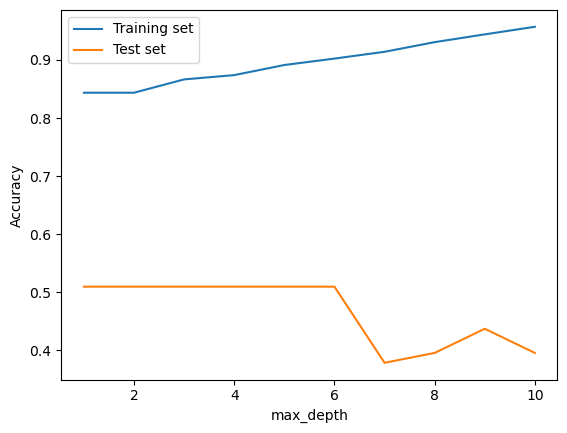

In [ ]:
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model.fit(features, target)
    train_predictions = model.predict(features)
    test_predictions = model.predict(test_features)
    print("Exactitud de max_depth igual a", depth)
    print("Conjunto de entrenamiento:", accuracy_score(target, train_predictions))
    print("Conjunto de prueba:", accuracy_score(test_target, test_predictions))
    print()

# plot

train_accuracies = []
test_accuracies = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model.fit(features, target)
    train_predictions = model.predict(features)
    test_predictions = model.predict(test_features)
    train_accuracies.append(accuracy_score(target, train_predictions))
    test_accuracies.append(accuracy_score(test_target, test_predictions))

plt.plot(range(1, 11), train_accuracies, label='Training set')

plt.plot(range(1, 11), test_accuracies, label='Test set')

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ¿ Cómo se puede resover?

* Compensar el sobreajuste de un modelo dividiendo los datos en conjuntos de entrenamiento y validación.
* Cambiar los hiperparámetros del modelo.
* Entrenar modelos de regresión de bosque aleatorio y logística.
* Comparar la calidad de los modelos resultantes para escoger el más adecuado.

### División de los datos

El dataset de validación se separa del dataset fuente antes de que se entrene el modelo. De otro modo, el modelo sabría todas las respuestas antes de aprender del conjunto de entrenamiento. 

La validación muestra cómo se comporta el modelo en el campo y ayuda a revelar si hay sobreajuste.

La parte de los datos que se va a asignar al conjunto de validación depende del número de observaciones y características, así como de la variación de los datos. Estos son los dos escenarios más comunes:

1) El conjunto de prueba existe (o existirá en el futuro cercano) pero no está disponible por el momento. La proporción ideal es 3:1. Esto significa que un 75 % es para el conjunto de entrenamiento y un 25 % es para el conjunto de validación. 

2) El conjunto de prueba no existe. En ese caso los datos fuente deben dividirse en tres partes: entrenamiento, validación y prueba. Usualmente, el tamaño del conjunto de validación y del de prueba son iguales. Esto da como resultado una proporción de datos fuente de 3:1:1   

In [79]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasets/train_house_price.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']


train_features, test_features, train_target, test_target =  train_test_split(features,target , test_size=0.25, random_state=12345)

print(train_features.shape)
print(test_features.shape)
print(train_target.shape)
print(test_target.shape)


(4871, 13)
(1624, 13)
(4871,)
(1624,)


## Hiperparámetros

Además de los parámetros de modelo regulares, tenemos hiperparámetros. Estos son configuraciones para algoritmos de aprendizaje. Por ejemplo, en el árbol de decisión, uno de los ejemplos es el parámetro de profundidad máxima. Otro son las opciones de criterio: Gini/entropía 

Los hiperparámetros también ayudan a mejorar el modelo y se pueden ajustar antes del entrenamiento.


In [80]:
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    predictions_valid = model.predict(test_features)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(test_target, predictions_valid))


max_depth = 1 : 0.8522167487684729
max_depth = 2 : 0.8522167487684729
max_depth = 3 : 0.8466748768472906
max_depth = 4 : 0.8725369458128078
max_depth = 5 : 0.8663793103448276


## DecisionTreeClassifier parámtros

    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Todos los hiperparámetros del algoritmo están dentro de los paréntesis.

* **min_samples_split**: Este hiperparámetro determina el número mínimo de observaciones que se deben tener en un nodo antes de que pueda dividirse. Su objetivo es evitar la creación de nodos que contengan un número insuficiente de observaciones del conjunto de entrenamiento.

* **min_samples_leaf**: Este hiperparámetro establece el número mínimo de observaciones que debe tener una hoja, es decir, un nodo final sin divisiones. Su propósito es prevenir que el algoritmo genere nodos hoja con un número insuficiente de observaciones del conjunto de entrenamiento.


In [87]:
best_score = 0
best_est = 0
for est in range(1, 11):
    model = DecisionTreeClassifier(random_state=54321, max_depth=est)
    model.fit(train_features, train_target)
    score = model.score(test_features, test_target)
    if score > best_score:
        best_score = score
        best_est = est

print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 8): 0.8731527093596059


## Índice de Gini 

* Probabilidad de que una característica específica se clasifique incorrectamente cuando se selecciona al azar.

* Rango entre 0 (un corte puro) a 0.5 (corte completamente puro que divide los datos en partes iguales). 

\begin{equation}
Gini = 1 - \sum_{i=1}^{n}(P_i)^2
\end{equation}

Donde $P_i$ es la probabilidad de que un elemento se clasifique en el grupo no adecuado. 


## Entropía.

Mide la aleatoriedad en los puntos de datos

\begin{equation}
E(S) = \sum_{i=1}^{c} -p_i log_2 (p_i)
\end{equation}

* El rango de la entropía va de 0 a 1. De esta forma, los valores cercanos a cero son menos impuros que aquellos que se acercan al 1.

In [ ]:


# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

In [ ]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [ ]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [ ]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [ ]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

In [ ]:
print(classification_report(Y_test,y_test_pred))

In [ ]:


feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T


In [ ]:
model.fit(features, target)


train_predictions = model.predict(features)
test_predictions = model.predict(test_features)
print('Exactitud')
print('Training set:', accuracy_score(target, train_predictions))
print('Test set:', accuracy_score(test_target, test_predictions))


In [ ]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_clf.fit(X_train, Y_train))

https://bookdown.org/keilor_rojas/CienciaDatos/introducci%C3%B3n-a-ciencia-de-datos-en-python.html

In [ ]:

# Importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de las características
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), features.columns[indices], rotation=90)
plt.show()